In [1]:
# for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
# load the datased

df = pd.read_csv(r"D:\ML\Machine Learning_Practical\Data\Advertising.csv")

In [3]:
# top 5 rows of dataset
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
print(f"Columns in dataset:\n{df.columns}")

Columns in dataset:
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


Dataset stores following **information**:
1. Expenditure on **`TV Advertisements`** (_Thousand \$_)
2. Expenditure on **`Radio Advertisements`** (_Thousand \$_)
3. Expenditure on **`Newspaper Advertisements`** (_Thousand \$_)
4. Total **`Sales`** (_Thousand \$_)

# Visualize Dataset- Relationship among features

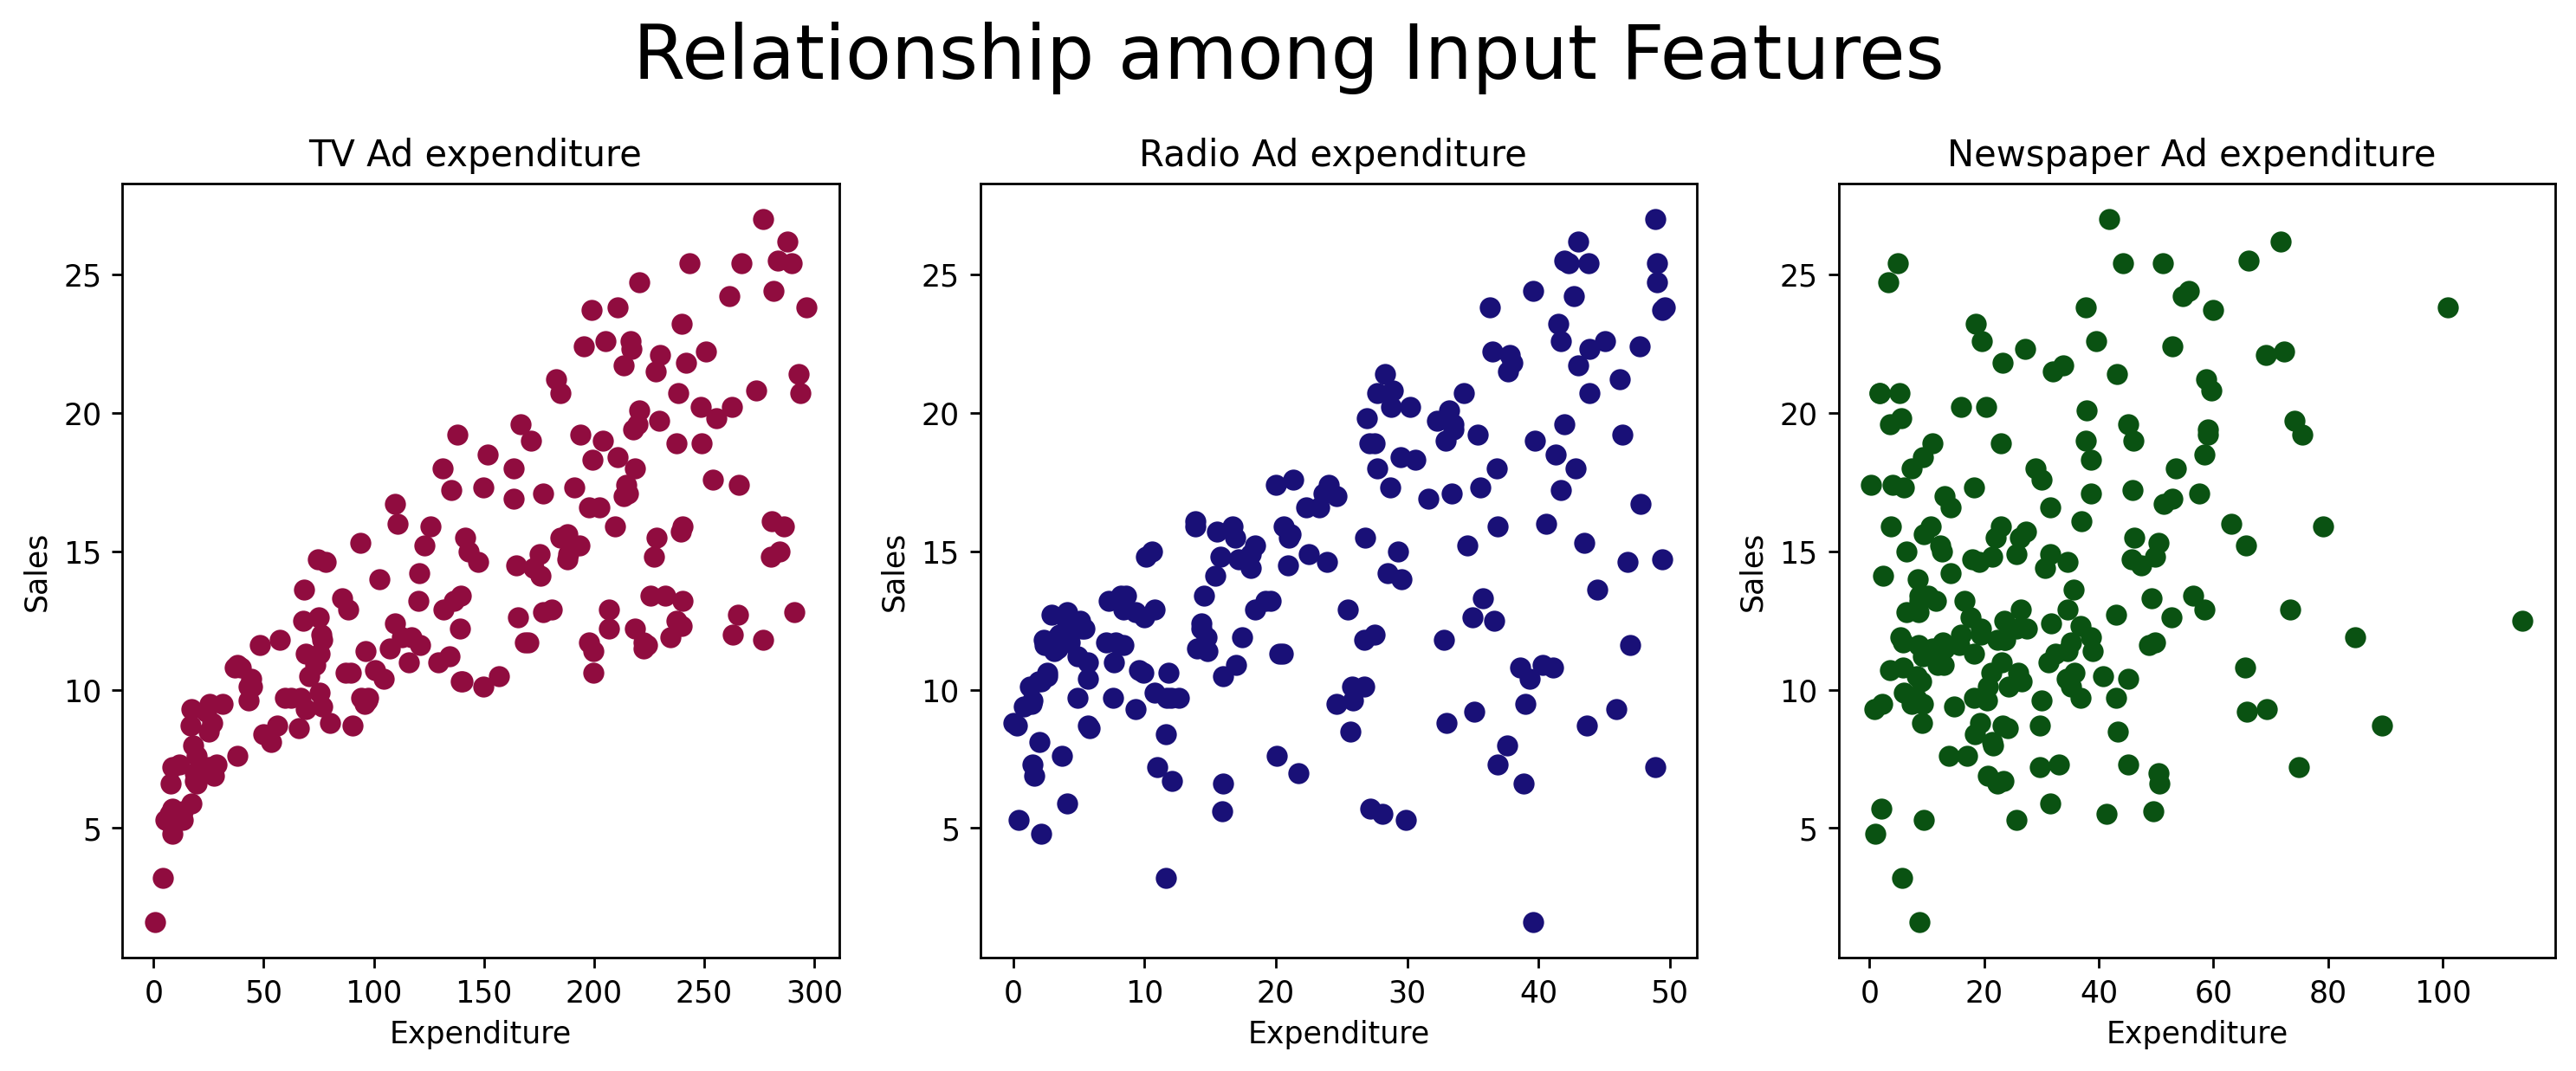

In [5]:
# create sub-plots for visualizing relationships

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), dpi=250)

ax1, ax2, ax3 = axes[0], axes[1], axes[2]

ax1.scatter(df["TV"], df["sales"], marker="o", color="#900C3F")
ax1.set_ylabel("Sales")
ax1.set_xlabel("Expenditure")
ax1.set_title("TV Ad expenditure ")


ax2.scatter(df["radio"], df["sales"], marker="o", color="#191077")
ax2.set_ylabel("Sales")
ax2.set_xlabel("Expenditure")
ax2.set_title("Radio Ad expenditure ")

ax3.scatter(df["newspaper"], df["sales"], marker="o", color="#0A5212")
ax3.set_ylabel("Sales")
ax3.set_xlabel("Expenditure")
ax3.set_title("Newspaper Ad expenditure ")


fig.suptitle("Relationship among Input Features", fontsize=25)

plt.tight_layout()

Spending on advertising on **TV** and **Radio** shows strong **linear relationship** with total sales.\
Relationship between **Newspaper Ad spending** and total sales is **less obvious**.

However, to improve upon **ML model's accuracy** from last time (_Linear Regression model_) will be probing with a **Polynomial Regression** model on this dataset.

In [6]:
# average sales amount
mean_sales = df["sales"].mean(axis=0)

print(mean_sales)

14.0225


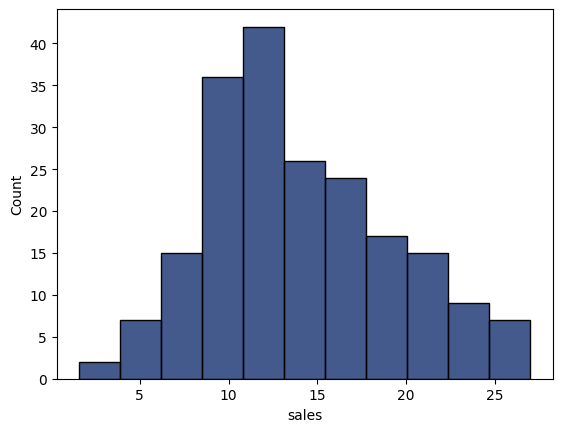

In [7]:
# histogram of sales

sns.histplot(data=df, x="sales", stat="count", color="#062366");

# Data Pre-processing

In [8]:
# input features

# all columns except "sales" will be inputs
# drop col named "sales" along columns (axis=1)
X = df.drop("sales", axis=1)

# target values

# "sales" column will be target variable
y = df["sales"]

In [9]:
# show input features
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
# show target labels
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

Since data is **already adequately scaled** need **not perform feature scaling** for this dataset and problem.

In [11]:
# check size of dataset
print(f"Size of dataset -> {X.shape[0]} Rows and {X.shape[1]} Columns")
print(f"\nInput features: {X.columns}")

Size of dataset -> 200 Rows and 3 Columns

Input features: Index(['TV', 'radio', 'newspaper'], dtype='object')


# Polynomial Regression

## Generating Polynomial Features from the available Input features

Goal is to generate polynomial features of **degree 2**- _i.e. A polynomial of power 2_.

In [12]:
# for generating polynomial fearures

from sklearn.preprocessing import PolynomialFeatures

In [13]:
# create instance of PolynomicalFeatures class
# degree=2 polynomial
# interaction_only=False -> Keeps degree 2 terms which are squares of single input features
# hence will retain both feature1 * feature2 (interaction terms) term
# aswell as feature1**2 (square terms) term (and so on)

poly_generator = PolynomialFeatures(degree=2, interaction_only=False,
                                   include_bias=False)

In [14]:
# fit polynomial features to dataset without generating them
# hence will study the dataset and input features but NOT transform them yet

poly_generator.fit(X)

PolynomialFeatures(include_bias=False)

In [15]:
# generate the degree 2 polynomial features
# by tranforming the dataset using the information learnt (fit)

poly_generator.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
print(f"Shape of original dataset: {X.shape[0]} Rows and {X.shape[1]} Columns")

print(f"Shape of dataset after generating Polynomial features: {poly_generator.transform(X).shape[0]} Rows and {poly_generator.transform(X).shape[1]} Columns")


Shape of original dataset: 200 Rows and 3 Columns
Shape of dataset after generating Polynomial features: 200 Rows and 9 Columns


In [17]:
# save the polynomial features (transformed dataset)

poly_features = poly_generator.transform(X)

### NOTE
>**Input features** increased from **originally 3** to now **9 features** after generating and adding degree 2 **polynomial features**.

>_Instead of above two-step process of fitting the polynomial features first and then transforming (generating) the features, could have done it in single step using_ **`fit_transform()`** _method of_ **`PolynomialFeatures`**

## Training set & Test set

Preparing the dataset with polynomial features for training and testing.

In [18]:
# for splitting (shuffle split) dataset into training & test set
from sklearn.model_selection import train_test_split

In [19]:
# split the transformed dataset (having 9 input features)
# poly_features = the Transformed dataset
# y (target variable) remains same since we are predicting it

# Training set = 70% data; Test set = 30% data
# NOTE: random_state=0 (same as in Linear Regression model training) will allow comparing performance
X_train, X_test, y_train, y_test = train_test_split(poly_features, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [20]:
# check size of datasets
print(f"Size of original dataset -> {X.shape[0]} Rows and {X.shape[1]} Columns")
print(f"Size of dataset after generating Polynomial features: {poly_generator.transform(X).shape[0]} Rows and {poly_generator.transform(X).shape[1]} Columns")
print(f"Size of Training set -> {X_train.shape[0]} Rows and {X_train.shape[1]} Columns")
print(f"Size of Test set -> {X_test.shape[0]} Rows and {X_test.shape[1]} Columns")

Size of original dataset -> 200 Rows and 3 Columns
Size of dataset after generating Polynomial features: 200 Rows and 9 Columns
Size of Training set -> 140 Rows and 9 Columns
Size of Test set -> 60 Rows and 9 Columns


# Creating a ML Model for Polynomial Regression

In [21]:
# import linear regression model (estimator)
from sklearn.linear_model import LinearRegression

In [22]:
# create instance of Linear regression model with default parameters
PRModel = LinearRegression()

# Training the ML Model on Training set

In [23]:
# fitting the training data with 9 features
PRModel.fit(X_train, y_train)

LinearRegression()

# Make Predictions on Test set

In [24]:
test_predictions = PRModel.predict(X_test)

In [25]:
print(f"First 5 predictions (on Test set) for sales -> \n{test_predictions[0:5]}")

First 5 predictions (on Test set) for sales -> 
[10.26189418  8.36710094  8.92289735 25.19150183 12.26547374]


In [26]:
# coefficients of trained polynomial
print(f"9 Coefficients for 9 features of trained Polynomial Regression Model:\n\n{PRModel.coef_}")

9 Coefficients for 9 features of trained Polynomial Regression Model:

[ 5.09008340e-02  2.21012015e-02 -1.68741981e-04 -1.03980136e-04
  1.05347362e-03 -5.62140335e-05  3.40985654e-04 -1.27099052e-05
  1.58255099e-04]


# Evaluating ML Model's Perfromance

In [27]:
# import different error metrics for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Mean Absolute Error in prediction

In [28]:
# mean_absolute_error(true y, predicted y)

mae = mean_absolute_error(y_test, test_predictions)

In [29]:
print(f"Mean of Actual Sales value = {mean_sales} (thousand $)")
print(f"Mean of Predicted Sales value = {test_predictions.mean()} (thousand $)")
print(f"Mean Absolute Error in predictions = {round(mae, ndigits=4)} (thousand $)")

Mean of Actual Sales value = 14.0225 (thousand $)
Mean of Predicted Sales value = 13.320751906553175 (thousand $)
Mean Absolute Error in predictions = 0.5493 (thousand $)


## Mean Squared Error in prediction

>Allows catching instances where model's predictions for few datapoints were too far off from reality (_even if it did well for most datapoints_).

In [30]:
# mean_sqaured_error(true y, predicted y)

mse = mean_squared_error(y_test, test_predictions)

In [31]:
# square root of mse to make units comparable to dataset labels

mse_sqrt = np.sqrt(mse)

In [32]:
print(f"Root Mean Squared error in model's predictions on Test set = {np.round(mse_sqrt, decimals=4)} (thousand $)")

Root Mean Squared error in model's predictions on Test set = 0.8803 (thousand $)


### Observation
**`Polynomial Regression`** model has **performed much better** compared to Linear Regression (LR) model trained previously.
>Error metrics for **LR model** ->\
**Mean Absolute Error** = 1.2334 (thousand \$)\
**Root Mean Squared Error** = 1.9213 (thousand \$)

>Error metrics for **PR model** ->\
**Mean Absolute Error** = 0.5493 (thousand \$)\
**Root Mean Squared Error** = 0.8803 (thousand \$)

## Comparing Performance Metrics (_Linear v/s Polynomial Model_)

In [33]:
# dataframe of error metrics
cols = ["MAE", "MSE"]
rows = ["LR Model", "PR Model"]
errors = np.array([
    [1.2334, 1.9213],
    [0.5493, 0.8803]
])
df_errors = pd.DataFrame(data=errors, index=rows, columns=cols)

df_errors

,MAE,MSE
LR Model,1.2334,1.9213
PR Model,0.5493,0.8803


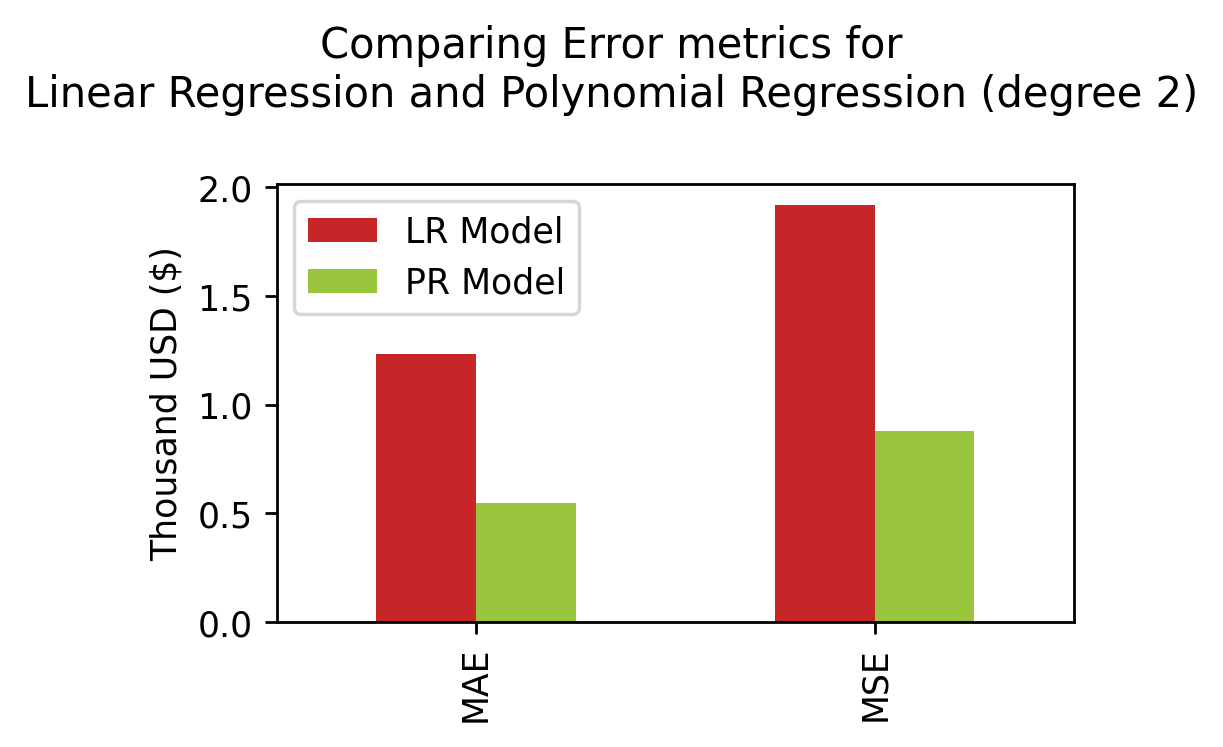

In [34]:
fig, ax = plt.subplots(figsize=(4,3), dpi=250)
colors = ["#C72527", "#99C53D"]
df_errors.transpose().plot(kind="bar", ax=ax, color=colors)
ax.set_ylabel("Thousand USD ($)")
fig.suptitle("Comparing Error metrics for\nLinear Regression and Polynomial Regression (degree 2)")
fig.tight_layout();

# Comparing and choosing best Degree of Polynomial Regression Model

### Workflow
1. Create **list of different degrees** of polynomials
---
2. **Loop** over list and for **each degree**
    - Split and create **training & test set**
    - **fit** training set to model with that degree
    - Compute and store **error metrics** (`Root Mean Squared Error`)
---
3. **Plot** error metrics v/s degree for visualization

In [35]:
# for storing root mean squared errors
train_rmse_errors = []
test_rmse_errors = []

# for storing degrees (degree=1 to degree=9)
degrees = [x for x in range(1, 10)]

In [36]:
# loop for considering each degree

for degree in degrees:
    
    # create instance of PolynomialFeatures with current degree
    poly_generator_degree = PolynomialFeatures(degree=degree,
                                              interaction_only=False,
                                              include_bias=False)
    
    # learn features (fit) & generate polynomial features from original dataset
    poly_features_degree = poly_generator_degree.fit_transform(X)
    
    # split the transformed dataset into training & test sets
    
    # Training set = 70% data; Test set = 30% data
    X_train, X_test, y_train, y_test = train_test_split(poly_features_degree, y,
                                                    test_size=0.3,
                                                    random_state=0)
    
    # create regression model for current degree
    model = LinearRegression()
    
    # (Training current model) fit training set
    model.fit(X_train, y_train)
    
    # make predictions with current trained model
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # compute & store error metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    train_rmse_errors.append(train_rmse)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_rmse_errors.append(test_rmse)

In [37]:
# rmse on training set
print(train_rmse_errors)

[1.5768437866753109, 0.47200307236619266, 0.3544992840406287, 0.26901943561273284, 0.24218807174711382, 0.19043273676965652, 5.604937687673253, 0.2008091064196036, 0.2428886103752772]


In [38]:
# rmse on test set
print(test_rmse_errors)

[1.921300300759515, 0.8802914106198204, 0.7453999704624433, 2.0423779799066715, 1.2072693551304439, 7.403410211124401, 2933.0396689733684, 67116.52895659908, 682131.0342157431]


### Observations
1. For **`Training set RMSE`** the **error keeps decreasing** as **degree of polynomial increase**
    - suggests **overfitting** since a more complext model (_higher degree_) trained on this data will be able to fit the data almost perfectly
---
2. For **`Test set RMSE`** the **error decreases initially** for initial degrees but as **degree of polynomial increase** the **error increases sharply**.
    - confirms **overfitting** (_i.e. Model has **high variance**_)

## Visualizing Performance by Models of different Degrees

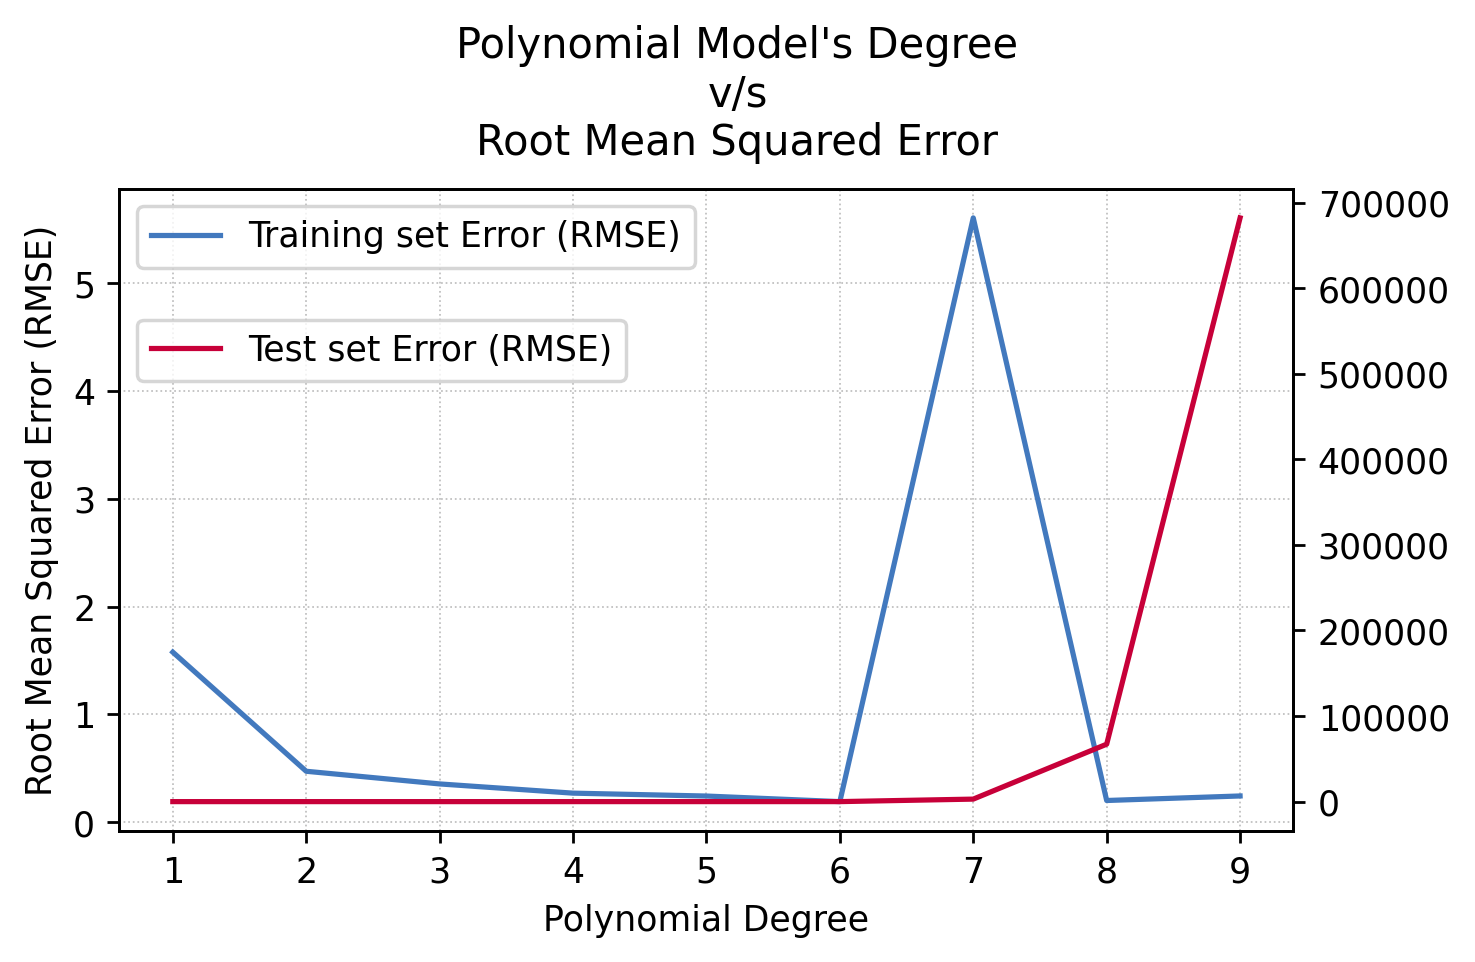

In [39]:
fig, ax = plt.subplots(figsize=(6,4), dpi=250)

# x-axis -> Polynomial degree
x = np.arange(1, 10)

# training error line
ax.plot(x, train_rmse_errors, label="Training set Error (RMSE)",
       color="#4279BE")

# twin axis for representing test error values
ax2 = ax.twinx()
# test error line
ax2.plot(x, test_rmse_errors, label="Test set Error (RMSE)",
       color="#C70039")

# y-axis label for both plots
ax.set_ylabel("Root Mean Squared Error (RMSE)")
# for better comprehension
ax.set_xlabel("Polynomial Degree")
ax.legend()
ax2.legend(loc=(0.015, 0.7))

# overall title for plot
fig.suptitle("Polynomial Model's Degree\nv/s\nRoot Mean Squared Error",
            x=0.5, y=0.95)

# grid
ax.grid(linestyle="dotted", color="#5D5D5E", linewidth=0.5, alpha=0.4)

# make plot fit properly
fig.tight_layout()

## Selecting the Best Model

While **`degree = 4 or 5`** gives **lesser error**,\
it **may not be necessary** to have such a **complex model** for the current probelem (_Ad Budget & Sales dataset_).

For balancing **simplicity** and **performance** better choose a **lower degree** model such as **`degree = 2 or 3`**

---

# Final Polynomial Regression Model (_3rd degree_) 

In [40]:
# final model

final_PR_generator = PolynomialFeatures(degree=3,
                                        interaction_only=False,
                                        include_bias=False)

final_PR_Model = LinearRegression()

In [41]:
# generate polynomial features on full dataset

X_final = final_PR_generator.fit_transform(X)

In [42]:
# # fit final model to entire dataset

final_PR_Model.fit(X_final, y)

LinearRegression()

# Deploying the Final Model

**Save** both the **model**  (**`final_PR_Model`**) and the final **polynomial features generator** (**`final_PR_generator`**)

In [43]:
# for saving model for future deplotment

from joblib import dump, load

In [51]:
# save model as a file

dump(final_PR_Model, r"D:\ML\Machine Learning_Practical\Scikit Learn\Regression Algorithms\Trained Models\final_PRModel_tv_ad_sales.joblib")

['D:\\ML\\Machine Learning_Practical\\Scikit Learn\\Regression Algorithms\\Trained Models\\final_PRModel_tv_ad_sales.joblib']

In [52]:
# save polynomial feature generator
dump(final_PR_generator, r"D:\ML\Machine Learning_Practical\Scikit Learn\Regression Algorithms\Trained Models\final_PRModel_Generator_tv_ad_sales.joblib")

['D:\\ML\\Machine Learning_Practical\\Scikit Learn\\Regression Algorithms\\Trained Models\\final_PRModel_Generator_tv_ad_sales.joblib']

## Making Predictions with the Final trained model

In [46]:
# load the model & feature generator
loaded_PR_generator = load("final_PRModel_Generator_tv_ad_sales.joblib")
loaded_PR_model = load("final_PRModel_tv_ad_sales.joblib")

In [47]:
# dummy new (previously unseen) data
# Ad Expenses -> $149K TV, $22K Radio, $12K Newspaper

campaign_expenses = np.array([
    [149, 22, 12]
])

In [48]:
# fit & transform the new data
campaign_expenses_transformed = loaded_PR_generator.fit_transform(campaign_expenses)

In [49]:
# predictions for total sales
# for degree=1 Linear Regression predicted sales = 13.893 Thousand $

predicted_sales = loaded_PR_model.predict(campaign_expenses_transformed)

In [50]:
print(f"Predicted Sales as per PR Model (degree = 3) = {np.round(predicted_sales[0], decimals=3)} Thousand $")

Predicted Sales as per PR Model (degree = 3) = 14.645 Thousand $
